In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset into a pandas DataFrame
df_main=pd.read_csv('C:/Users/raksh/Downloads/diabetes1 (1).csv')

# Display the first few rows of the pre-processed dataset
print("First few rows:")
df_main.head()


First few rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1,0,...,0,0,1,0,0,0,0,1,0,0


In [2]:
df = df_main[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

#Spliting the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

diabetes_features = X.columns

def plot_feature_importances_diabetes(model, diabetes_features):
    plt.figure(figsize=(8, 6))
    
    # Sort feature importances and corresponding feature names in ascending order
    sorted_indices = np.argsort(model.feature_importances_)  
    sorted_importances = model.feature_importances_[sorted_indices]
    sorted_features = [diabetes_features[i] for i in sorted_indices]
    
    sns.barplot(x=sorted_importances, y=sorted_features)
    plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8])
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importances across the dataset")
    plt.show()

# Example usage:
# plot_feature_importances_diabetes(model, diabetes_features)


##### X_train, y_train: These contain the features and labels, respectively, for the training set.
##### X_val, y_val: These contain the features and labels, respectively, for the validation set.
##### X_test, y_test: These contain the features and labels, respectively, for the testing set.
##### The data is now split as follows:

##### 60% of the original data is in the training set.
##### 20% of the original data is in the validation set.
##### 20% of the original data is in the testing set.

In [4]:
# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature importance in Decision Tree Classifier 

Accuracy on training set: 1.000
Accuracy on validation set: 1.000
Accuracy on test set: 0.721

With max_depth=3:
Accuracy on training set: 0.775
Accuracy on validation set: 0.818
Accuracy on test set: 0.760


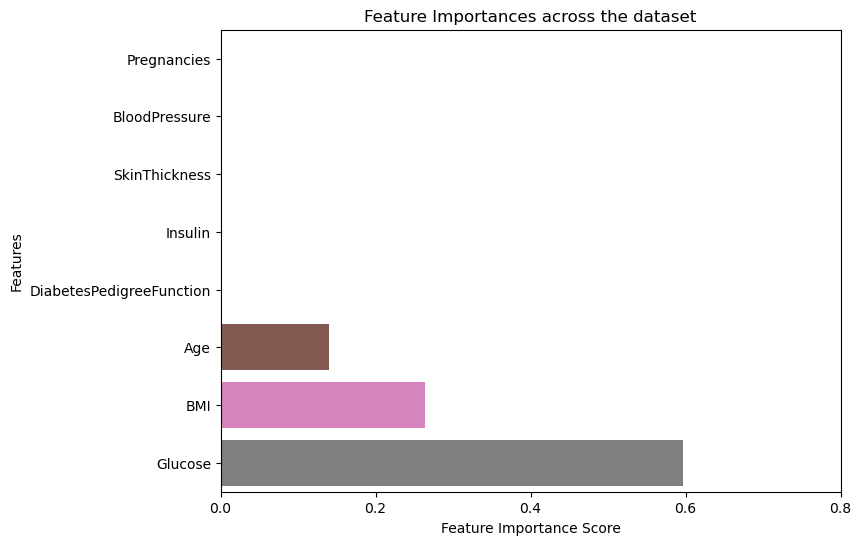

+--------------------------+--------------+
| Feature                  |   Importance |
+==========================+==============+
| Pregnancies              |     0        |
+--------------------------+--------------+
| Glucose                  |     0.596625 |
+--------------------------+--------------+
| BloodPressure            |     0        |
+--------------------------+--------------+
| SkinThickness            |     0        |
+--------------------------+--------------+
| Insulin                  |     0        |
+--------------------------+--------------+
| BMI                      |     0.263305 |
+--------------------------+--------------+
| DiabetesPedigreeFunction |     0        |
+--------------------------+--------------+
| Age                      |     0.14007  |
+--------------------------+--------------+


In [5]:
from tabulate import tabulate

# Train a Decision Tree Classifier with default parameters
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(tree.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Train a Decision Tree Classifier with max_depth=3
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("\nWith max_depth=3:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(tree.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Get feature importances
feature_importances = tree.feature_importances_

# Print feature importances
#for feature, importance in zip(X_train.columns, feature_importances):
    #print(f"\n{feature}: {importance:.4f}")

# Assuming you have a function plot_feature_importances_diabetes defined
plot_feature_importances_diabetes(tree,diabetes_features)


# Assuming X_train.columns contains the column names of your features
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
#print(feature_importances_df)

# Assuming X_train.columns contains the column names of your features
feature_importances_table = [[feature, importance] for feature, importance in zip(X_train.columns, feature_importances)]
print(tabulate(feature_importances_table, headers=['Feature', 'Importance'], tablefmt='grid'))

##### Feature "Glucose" is by far the most important feature.

### Feature importance in Random Forest

[0.04543758 0.23741341 0.04725688 0.06812797 0.12653546 0.21286535
 0.15398914 0.10837421]
Accuracy on training set: 1.000
Accuracy on validation set: 1.000
Accuracy on test set: 0.747

With max_depth=3:
Accuracy on training set: 0.793
Accuracy on validation set: 0.805
Accuracy on test set: 0.799


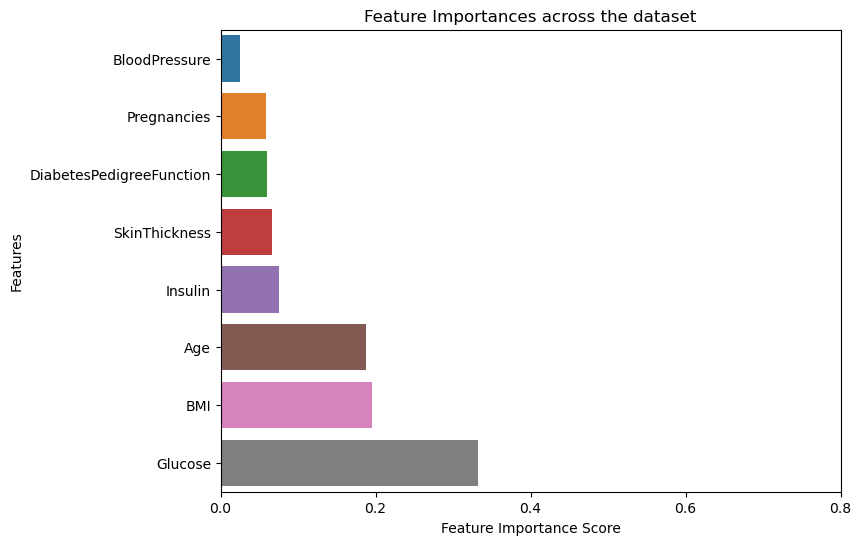

+--------------------------+--------------+
| Feature                  |   Importance |
+==========================+==============+
| Pregnancies              |    0.0770368 |
+--------------------------+--------------+
| Glucose                  |    0.247932  |
+--------------------------+--------------+
| BloodPressure            |    0.0847625 |
+--------------------------+--------------+
| SkinThickness            |    0.0824121 |
+--------------------------+--------------+
| Insulin                  |    0.0610615 |
+--------------------------+--------------+
| BMI                      |    0.167346  |
+--------------------------+--------------+
| DiabetesPedigreeFunction |    0.126887  |
+--------------------------+--------------+
| Age                      |    0.152562  |
+--------------------------+--------------+


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train a Random Forest Classifier with default parameters
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print(rf.estimators_[0].feature_importances_)

# Print accuracy on training, validation, and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

# Train a Random Forest Classifier with max_depth=3
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("\nWith max_depth=3:")
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf1.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

# Get feature importances
feature_importances = rf.feature_importances_

# Print feature importances
#for feature, importance in zip(X_train.columns, feature_importances):
    #print(f"\n{feature}: {importance:.4f}")

# Assuming you have a function plot_feature_importances_diabetes defined
plot_feature_importances_diabetes(rf1,diabetes_features)

# Assuming X_train.columns contains the column names of your features
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
#print(feature_importances_df)

# Assuming X_train.columns contains the column names of your features
feature_importances_table = [[feature, importance] for feature, importance in zip(X_train.columns, feature_importances)]
print(tabulate(feature_importances_table, headers=['Feature', 'Importance'], tablefmt='grid'))

##### Feature "Glucose" is by far the most important feature.

##### Based on the evaluation on the test dataset, we found that the Random Forest model outperforms the Decision Tree model in terms of accuracy. Therefore, we conclude that Random Forest is a better choice for feature importance.